In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

In [33]:
data = pd.read_csv('ICICI.csv')

In [34]:
data = data.dropna()

In [35]:
y = data['Adj Close']

In [36]:
X = data.drop('Adj Close', axis=1)


In [37]:
X['Date'] = pd.to_datetime(X['Date'])
X['Date'] = X['Date'].astype(np.int64) // 10**9

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
X_train[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = imputer.transform(X_test[numeric_columns])


In [40]:
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [41]:
base_model = DecisionTreeRegressor(max_depth=5)


In [42]:
bagging_model = BaggingRegressor(base_model, n_estimators=10, random_state=42)

In [43]:
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), random_state=42)

In [44]:
bagging_predictions = bagging_model.predict(X_test)

In [45]:
bagging_mse = mean_squared_error(y_test, bagging_predictions)
print("Bagging MSE:", bagging_mse)

Bagging MSE: 14.678922635345327


In [46]:
base_model = DecisionTreeRegressor(max_depth=2)

In [47]:
boosting_model = AdaBoostRegressor(base_model, n_estimators=10, random_state=42)

In [48]:
boosting_model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2), n_estimators=10,
                  random_state=42)

In [49]:
boosting_predictions = boosting_model.predict(X_test)

In [50]:
boosting_mse = mean_squared_error(y_test, boosting_predictions)
print("Boosting MSE:", boosting_mse)

Boosting MSE: 1677.7480494707024


In [51]:
import matplotlib.pyplot as plt

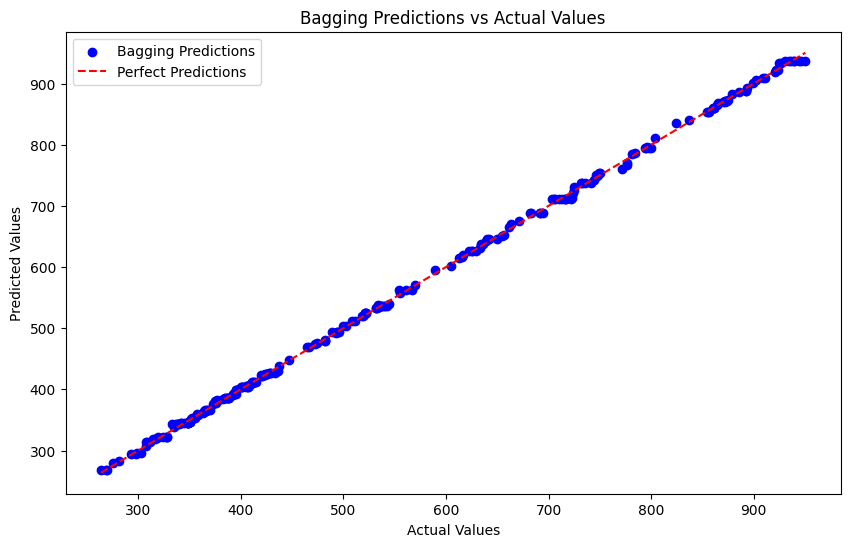

In [52]:
# Plotting bagging predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, bagging_predictions, color='blue', label='Bagging Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Bagging Predictions vs Actual Values')
plt.legend()
plt.show()

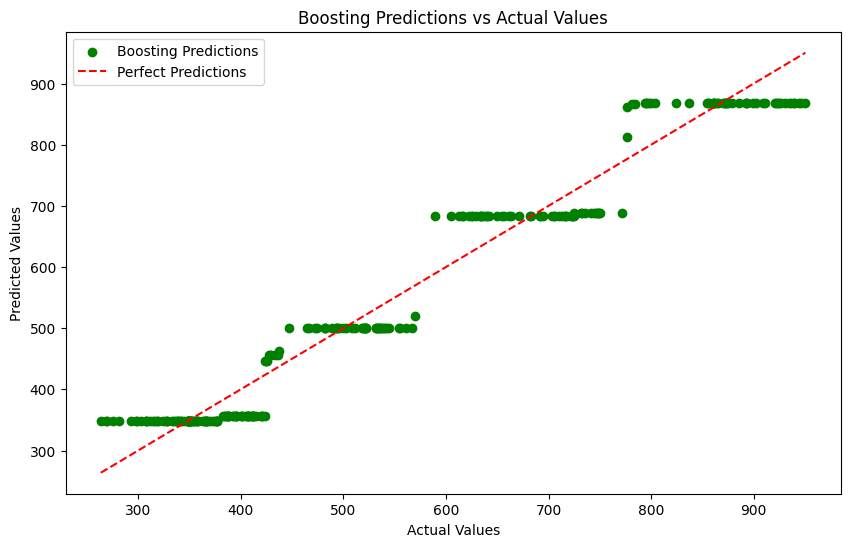

In [53]:
# Plotting boosting predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, boosting_predictions, color='green', label='Boosting Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Boosting Predictions vs Actual Values')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import accuracy_score